### RGBD images
Open3D has a data structure for images. It supports various functions such as **read_image**, **write_image**, **filter_image** and **draw_geometries**. An Open3D Image can be directly converted to/from a numpy array.

An Open3D **RGBDImage** is composed of two images, **RGBDImage.depth** and **RGBDImage.color**. We require the two images to be registered into the same camera frame and have the same resolution. The following tutorials show how to read and use RGBD images from a number of well known RGBD datasets.

#### Redwood dataset
In this section we show how to read and visualize an **RGBDImage** from the [Redwood dataset\[Choi2015\]](http://redwood-data.org/)

The Redwood format stored depth in a 16-bit single channel images. The integer value represents the depth measurement in millimeters. It is the default format for Open3D to parse depth images.


In [1]:
import open3d as o3d
import copy
import numpy as np
import matplotlib.pyplot as plt
import Open3D.examples.python.open3d_tutorial as o3dtut

[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\normal_map.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\tests\cube.obj already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\vertex_map.npy already exists, skipped.


Read Redwood dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


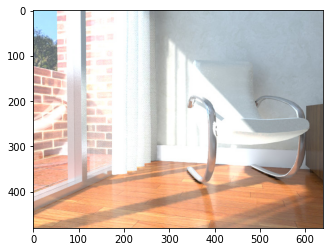

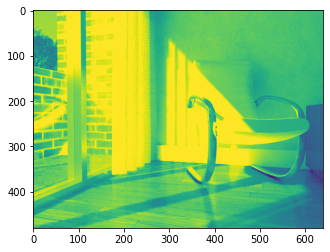

In [2]:
print(f'Read Redwood dataset')
color_raw = o3d.io.read_image("Open3D/examples/test_data/RGBD/color/00000.jpg")
depth_raw = o3d.io.read_image("Open3D/examples/test_data/RGBD/depth/00000.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)
#print(np.asarray(color_raw))
plt.imshow(color_raw)
plt.show()
plt.imshow(rgbd_image.color)
plt.show()


The default conversion function **create_rgbd_image_from_color_and_depth** creates an RGBDImage from a pair of color and depth images. The color image is converted into a grayscale image, stored in **float** ranged in \[0, 1\]. The depth image is stored in **float**, representing the depth value in meters.

The converted images can be rendered as numpy arrays.

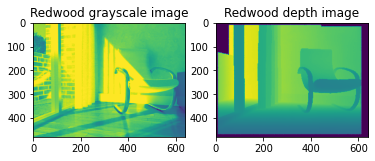

In [3]:
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
#plt.imshow(rgbd_image.color, cmap='rainbow')
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

The RGBD image can be converted into a point cloud, given a set of camera parameters.

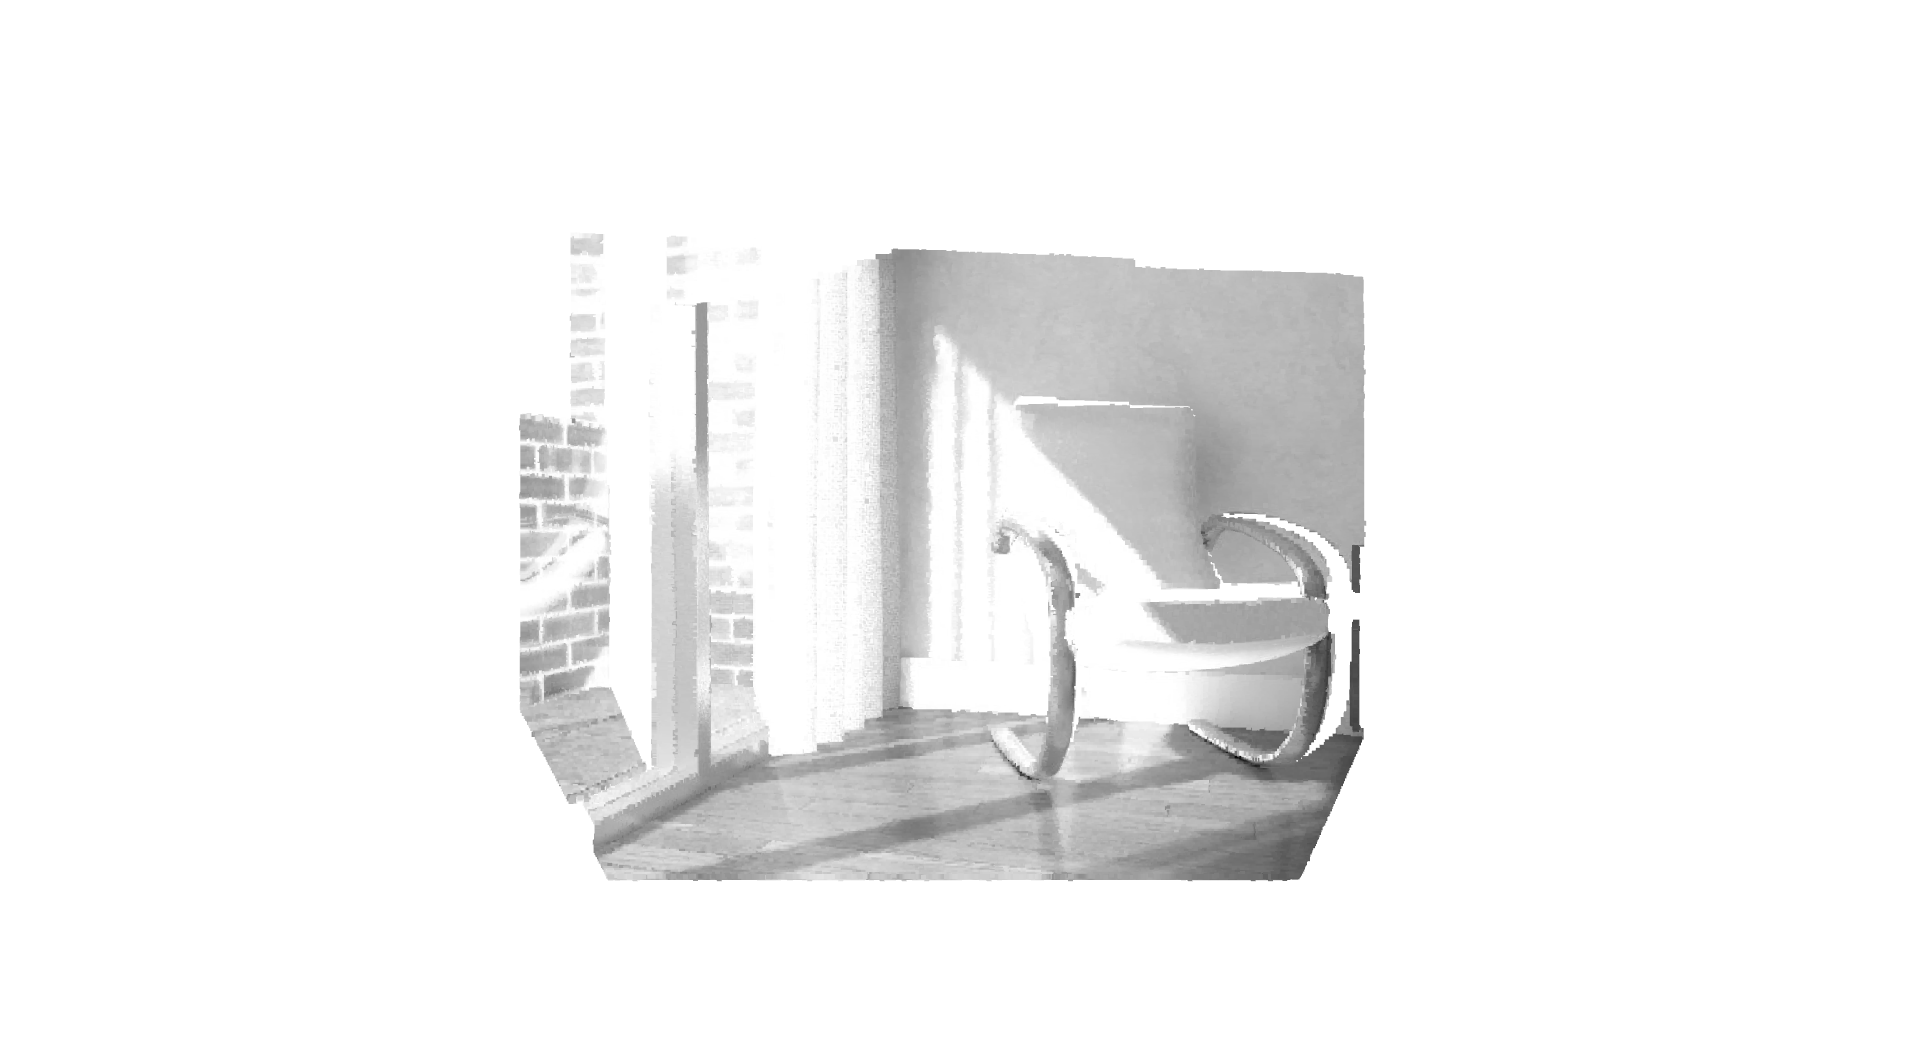

In [4]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd], zoom=0.5)

Here we use **PinholeCameraIntrinsicParameters.PrimeSenseDefault** as default camera parameter. It has image resolution 640 x 480, focal length(fx, fy) = (525.0, 525.0), and optical center (cx, cy) = (319.5, 239.5). An identity matrix is used as the default extrinsic parameter. **pcd.transform** applies an updown flip transformation on the point cloud for better visualization purpose.

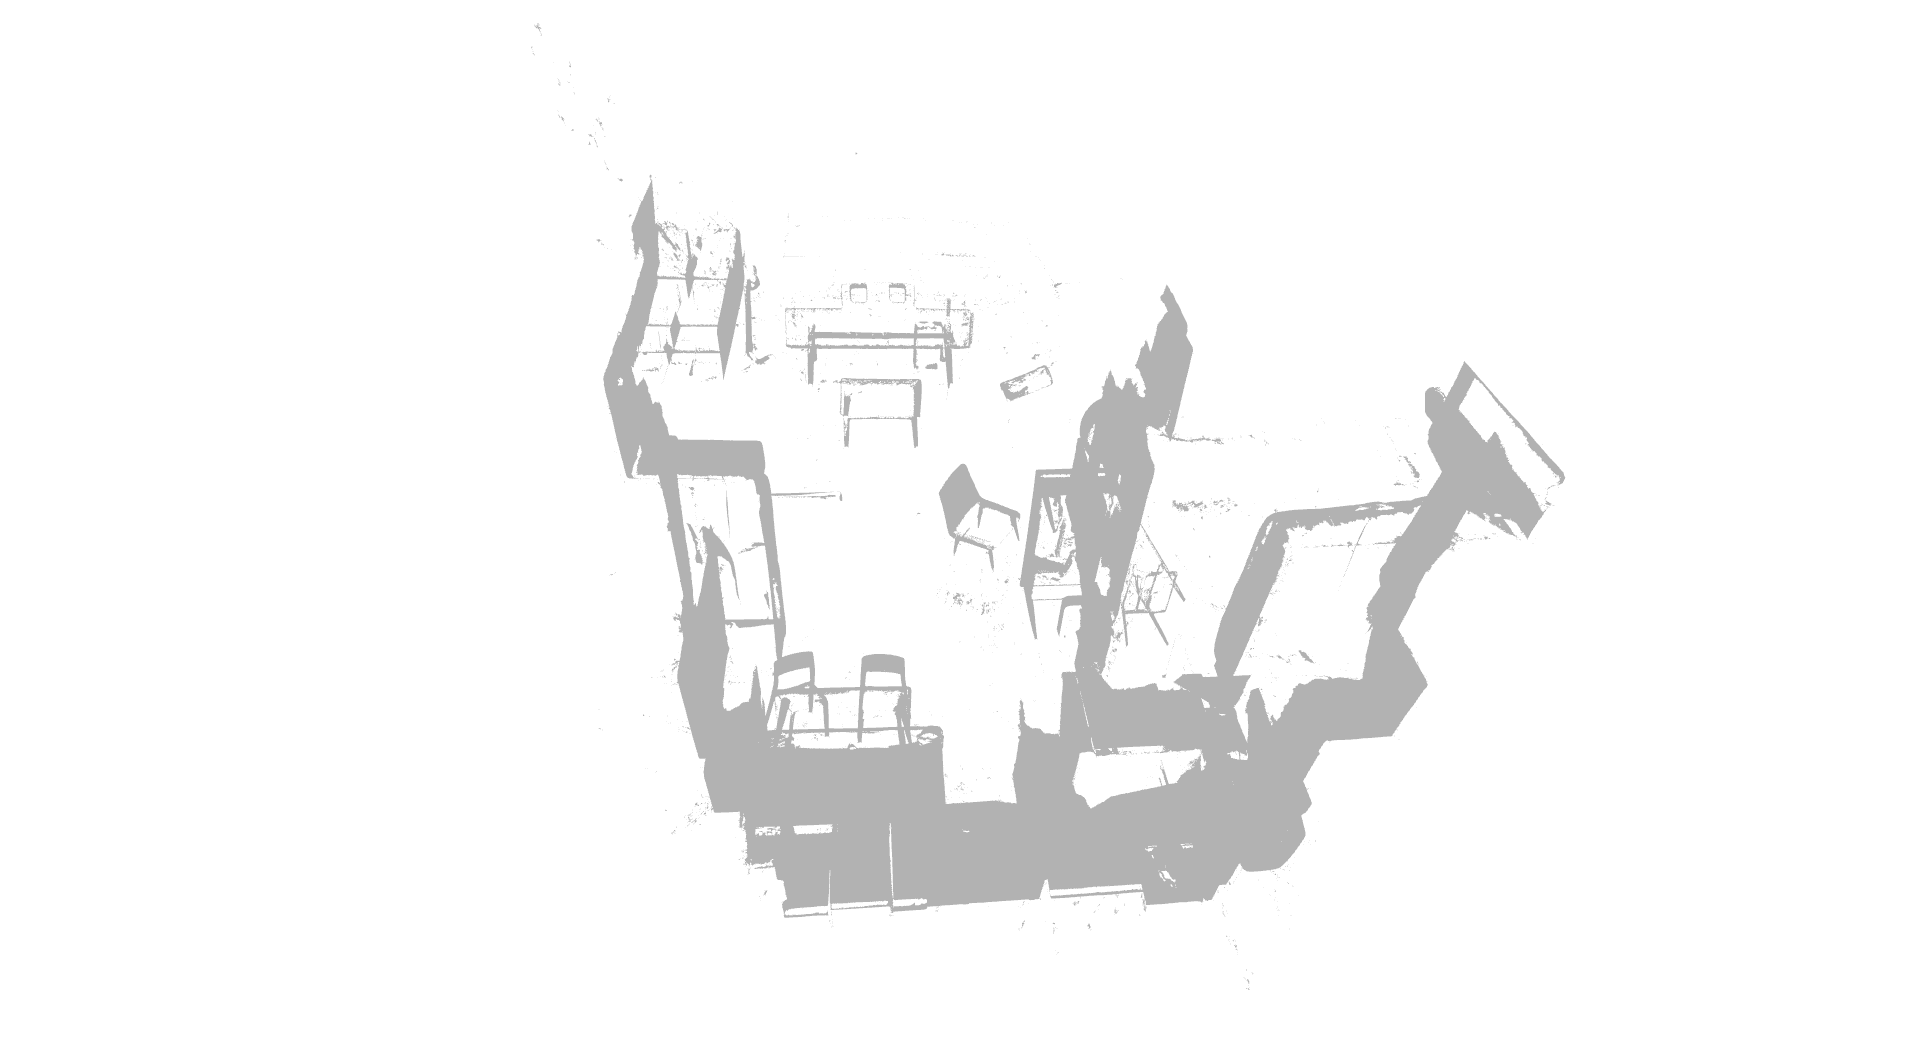

In [6]:
## A Sample from Redwood dataset
apartment = o3d.io.read_triangle_mesh("Lidar/apartment.ply")
o3d.visualization.draw_geometries([apartment], )

In [2]:
## Camera test for developped
# import cv2
# cap = cv2.VideoCapture(0)
# while True:
#     _, frame = cap.read()
#     frame = cv2.cvtColor(frame, cv2.COLOR_YUV2BGR)
#     cv2.imshow("Test", frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

#### SUN dataset
In this section we show how to read and visualize an RGBDImage of the [SUN dataset\[Song2015\]](http://rgbd.cs.princeton.edu/). 

This tutorial is almost the same as the Redwood dataset above. The only difference is that we use the conversion function **create_rgbd_image_from_sun_format** to parse depth images in the SUN dataset.

In [7]:
print(f'Read SUN dataset')
color_raw = o3d.io.read_image("Open3D/examples/test_data/RGBD/other_formats/SUN_color.jpg")
depth_raw = o3d.io.read_image("Open3D/examples/test_data/RGBD/other_formats/SUN_depth.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_sun_format(color_raw, depth_raw)
print(rgbd_image)

Read SUN dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


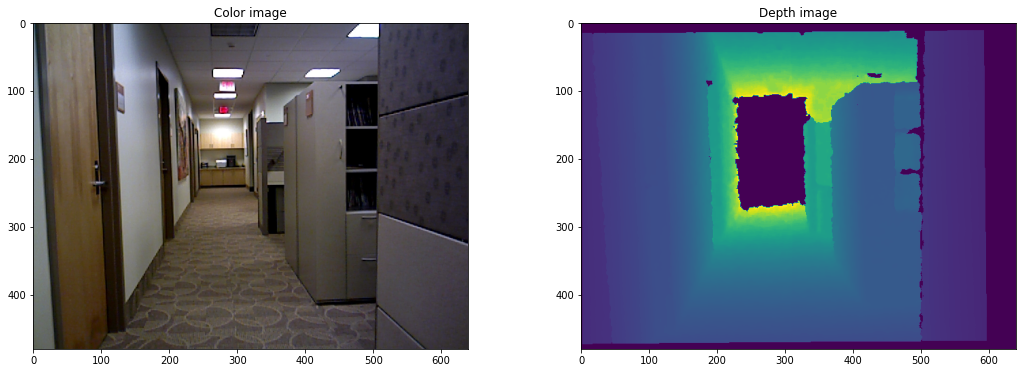

In [13]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Color image")
ax1.imshow(color_raw) # uint8
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Depth image")
ax2.imshow(depth_raw) # uint8

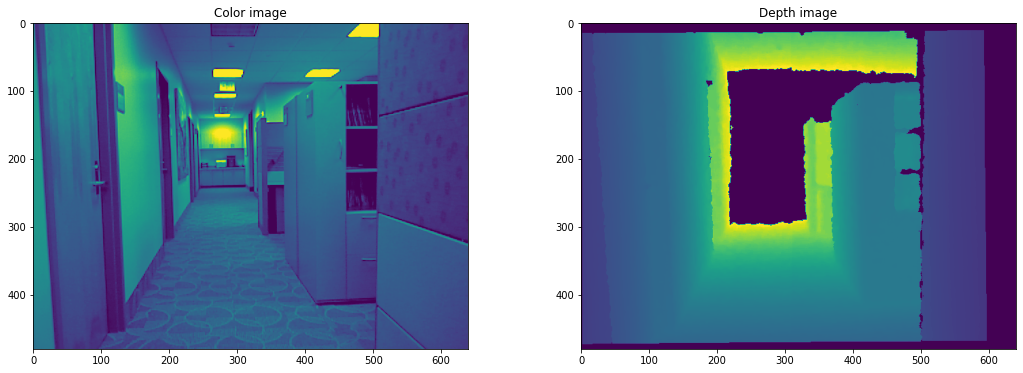

In [14]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Color image')
ax1.imshow(rgbd_image.color) # [0, 1]
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Depth image')
ax2.imshow(rgbd_image.depth) # [0, 1]

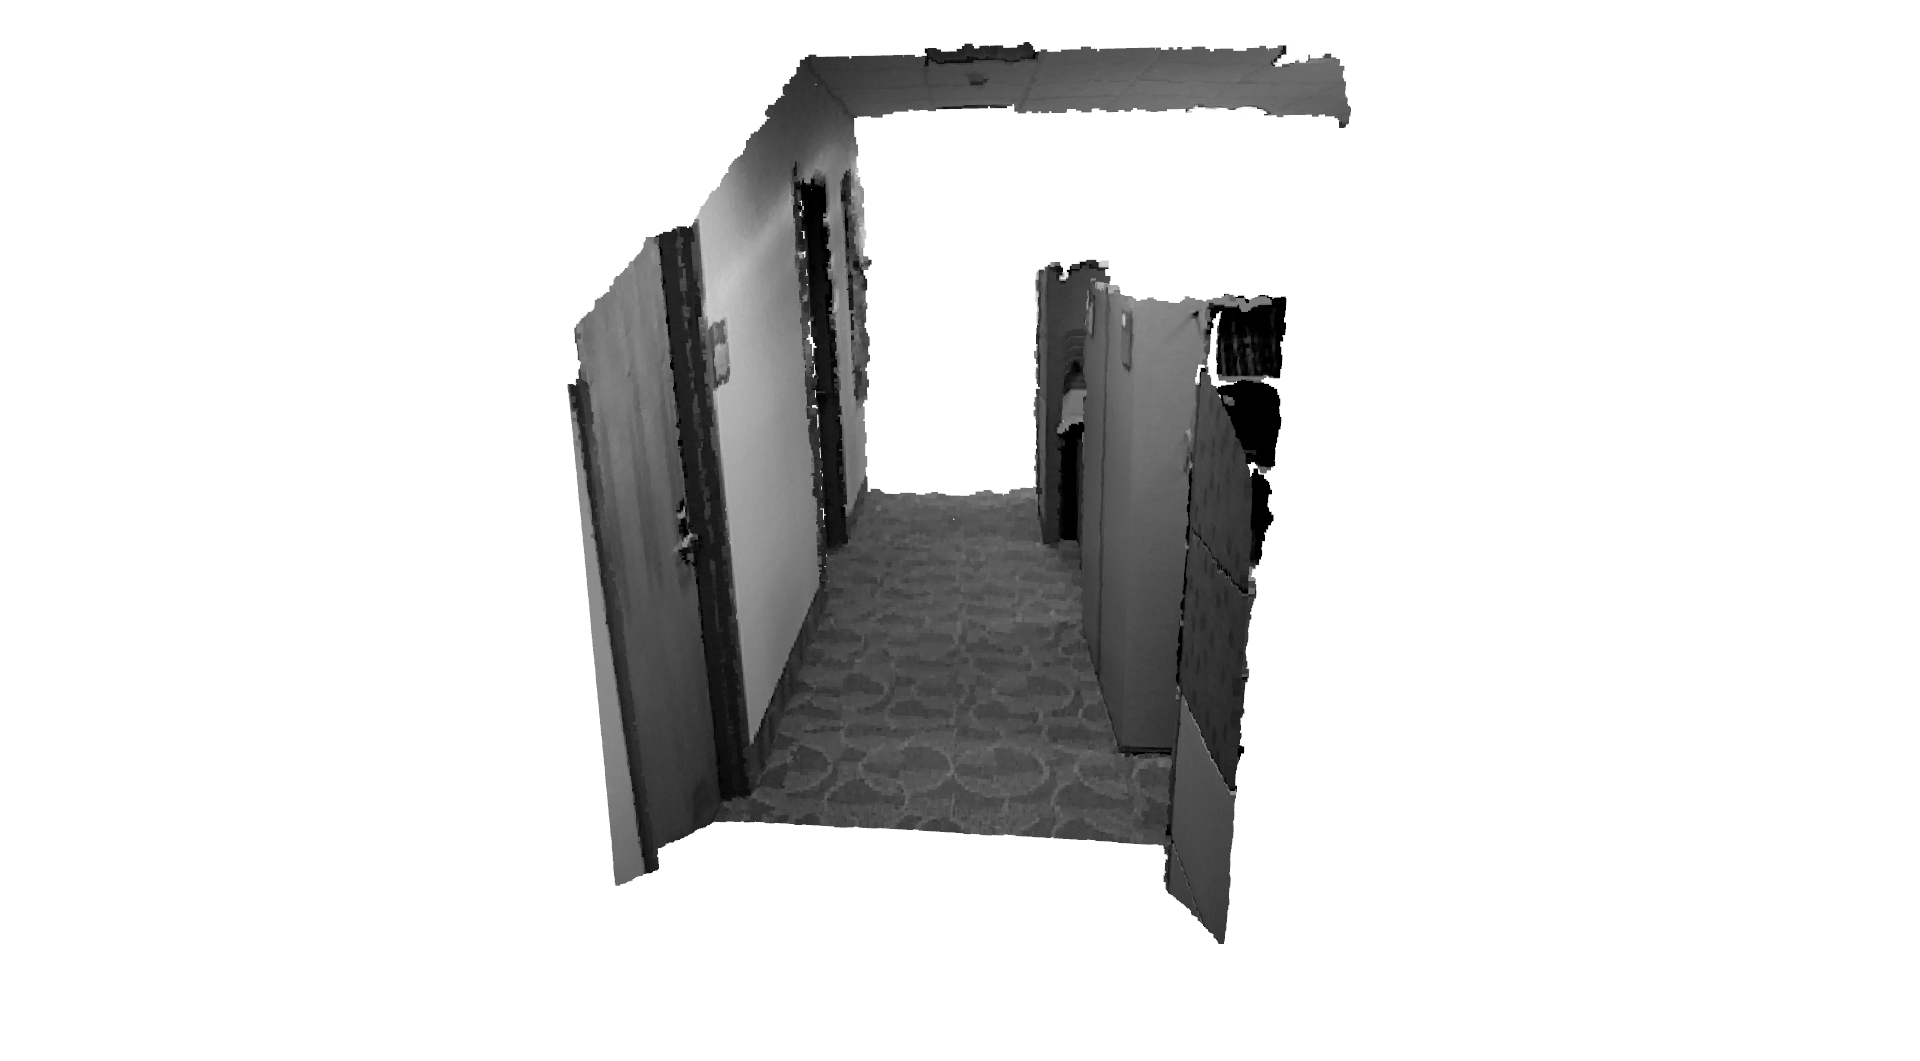

In [15]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd], zoom=0.5)

#### NYU dataset
This section shows how to read and visualize an **RGBDImage** from the [NYU dataset\[Silberman2012\]](https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html).

This tutorial is almost the same as Redwood dataset above, with two differences. First, NYU images are not in standard **jpg** or **png** formats. Thus, we use **mpimg.imread** to read the color images as a numpy array and convert it to an Open3D **Image**. An additional helper function **read_nyu_pgm** is called to read depth images from the special big endian **pgm** format used in the NYU dataset. Second, we use a different conversion function **create_rgbd_image_from_nyu_format** to parse depth images in the SUN dataset.

In [16]:
import matplotlib.image as mpimg
import re 

# This is special function used for reading NYU pgm format as it is written in big endian byte order.
def read_nyu_pgm(filename, byteorder='>'):
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    img = np.frombuffer(buffer, dtype=byteorder + 'u2', count=int(width) * int(height),
                        offset=len(header)).reshape((int(height), int(width)))
    img_out = img.astype('u2')
    return img_out

print("Read NYU dataset")
# Open3D does not support ppm/pgm file yet. Not using o3d.io.read_image here.
# MathplotImage having some ISSUE with NYU pgm file. Not using imread for pgm.
color_raw = mpimg.imread("Open3D/examples/test_data/RGBD/other_formats/NYU_color.ppm")
depth_raw = read_nyu_pgm("Open3D/examples/test_data/RGBD/other_formats/NYU_depth.pgm")
color = o3d.geometry.Image(color_raw)
depth = o3d.geometry.Image(depth_raw)
rgbd_image = o3d.geometry.RGBDImage.create_from_nyu_format(color, depth)
print(rgbd_image)

Read NYU dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


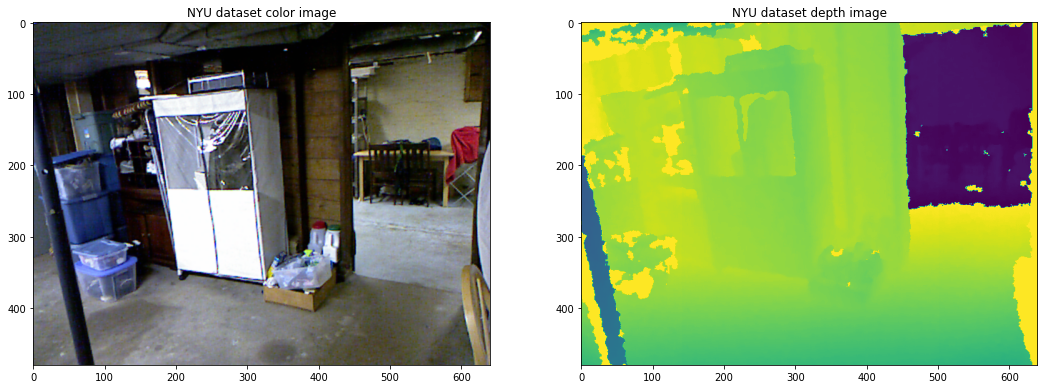

In [21]:
# Checking images
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("NYU dataset color image")
ax1.imshow(color) # 
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("NYU dataset depth image")
ax2.imshow(depth_raw) # 

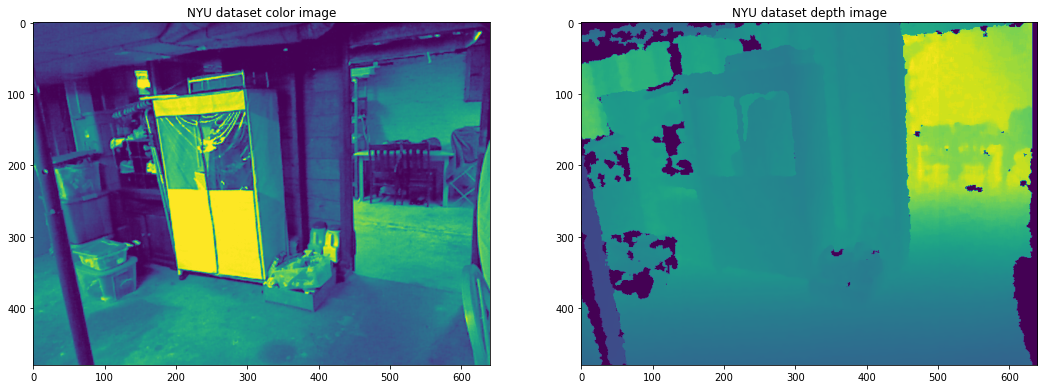

In [22]:
# Checking images
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("NYU dataset color image")
ax1.imshow(rgbd_image.color) # 
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("NYU dataset depth image")
ax2.imshow(rgbd_image.depth) # 

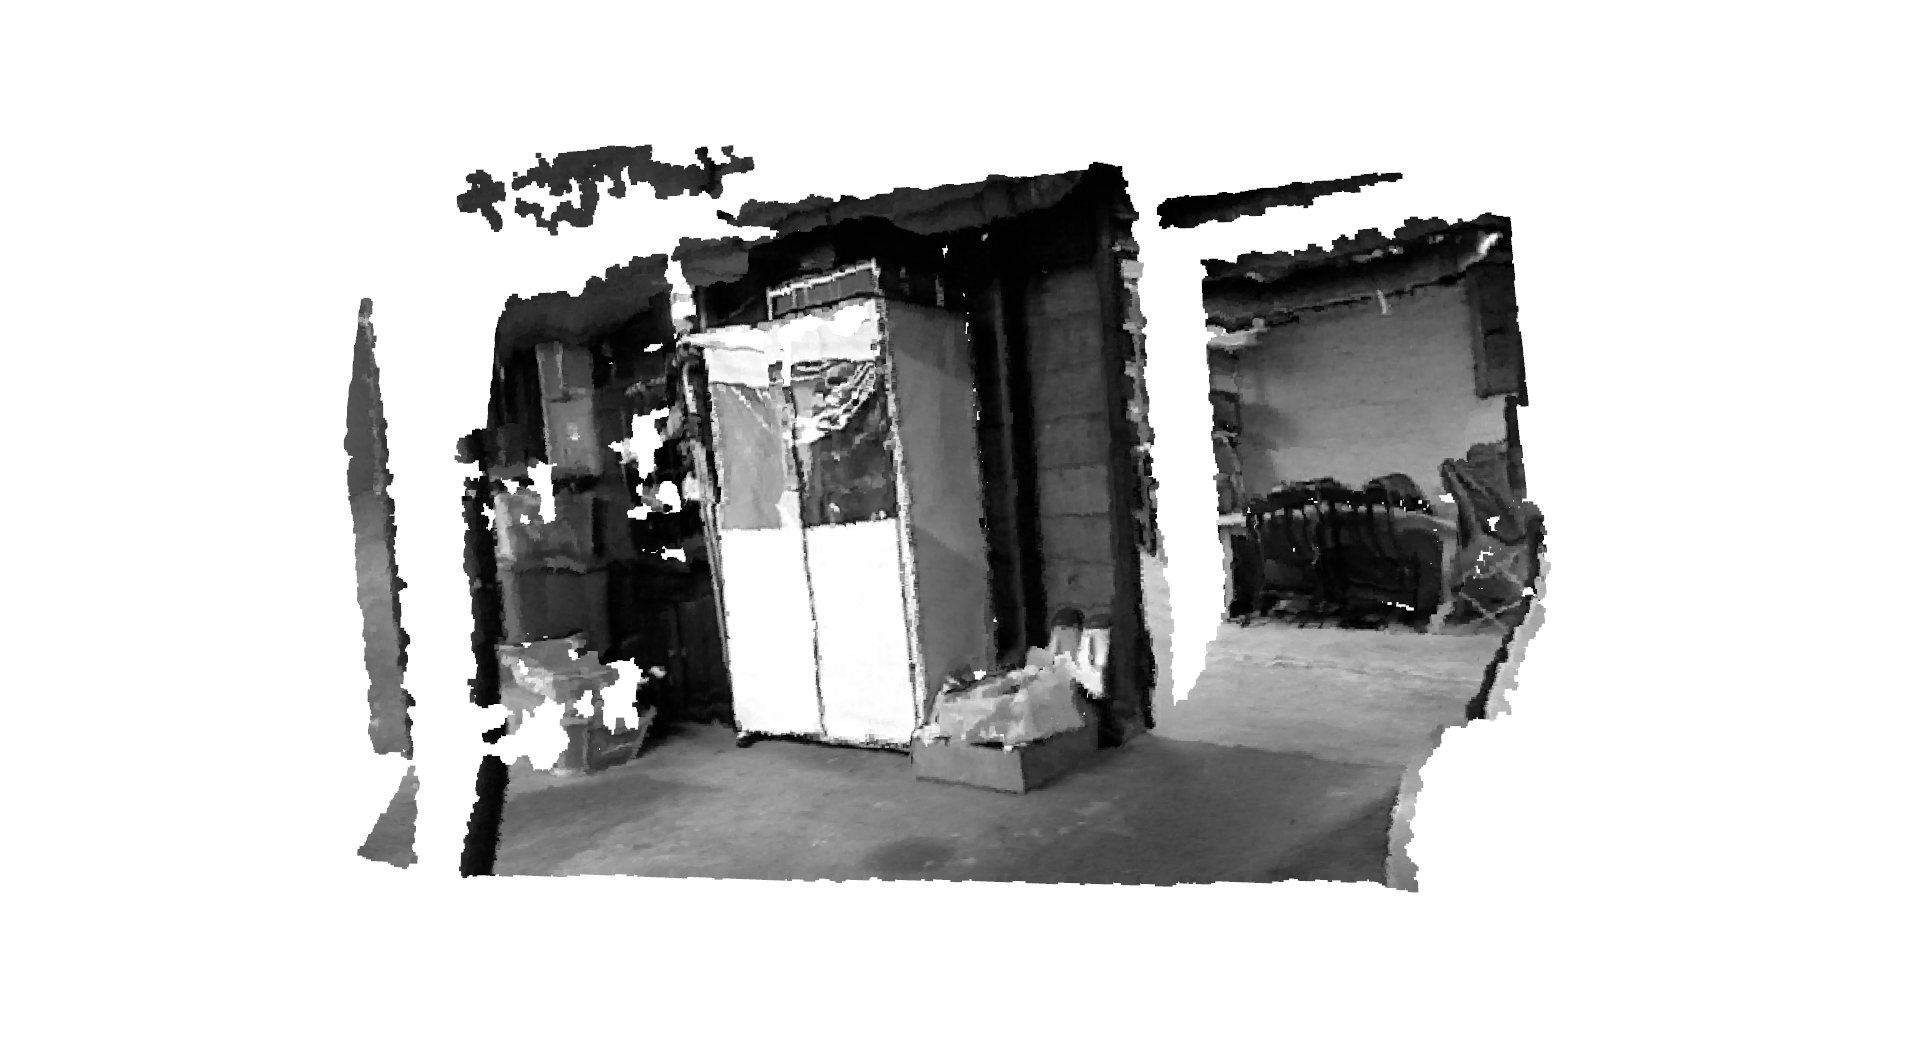

In [25]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)
)

# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd], zoom=0.5, point_show_normal=True,
    mesh_show_wireframe=False)

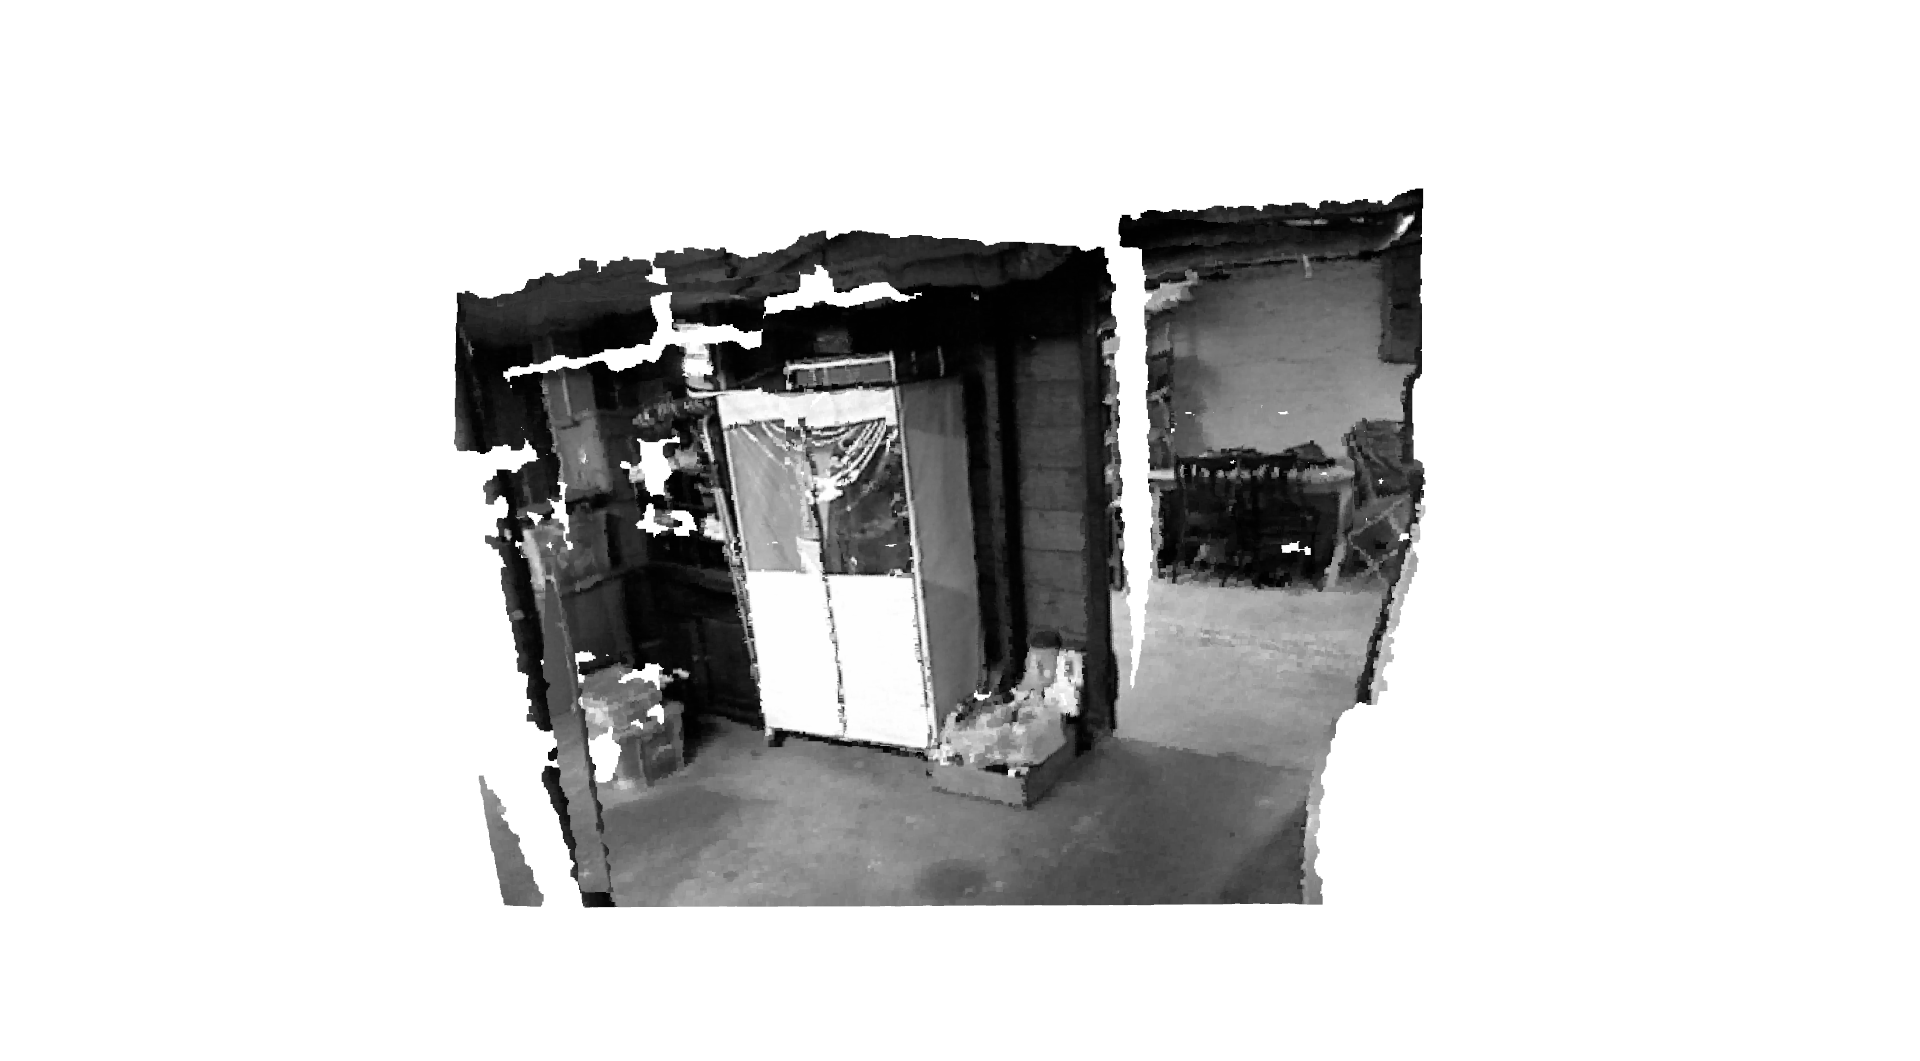

In [27]:
# wireframe
o3d.visualization.draw_geometries([pcd], zoom=0.5, point_show_normal=False,
    mesh_show_wireframe=True) # No difference

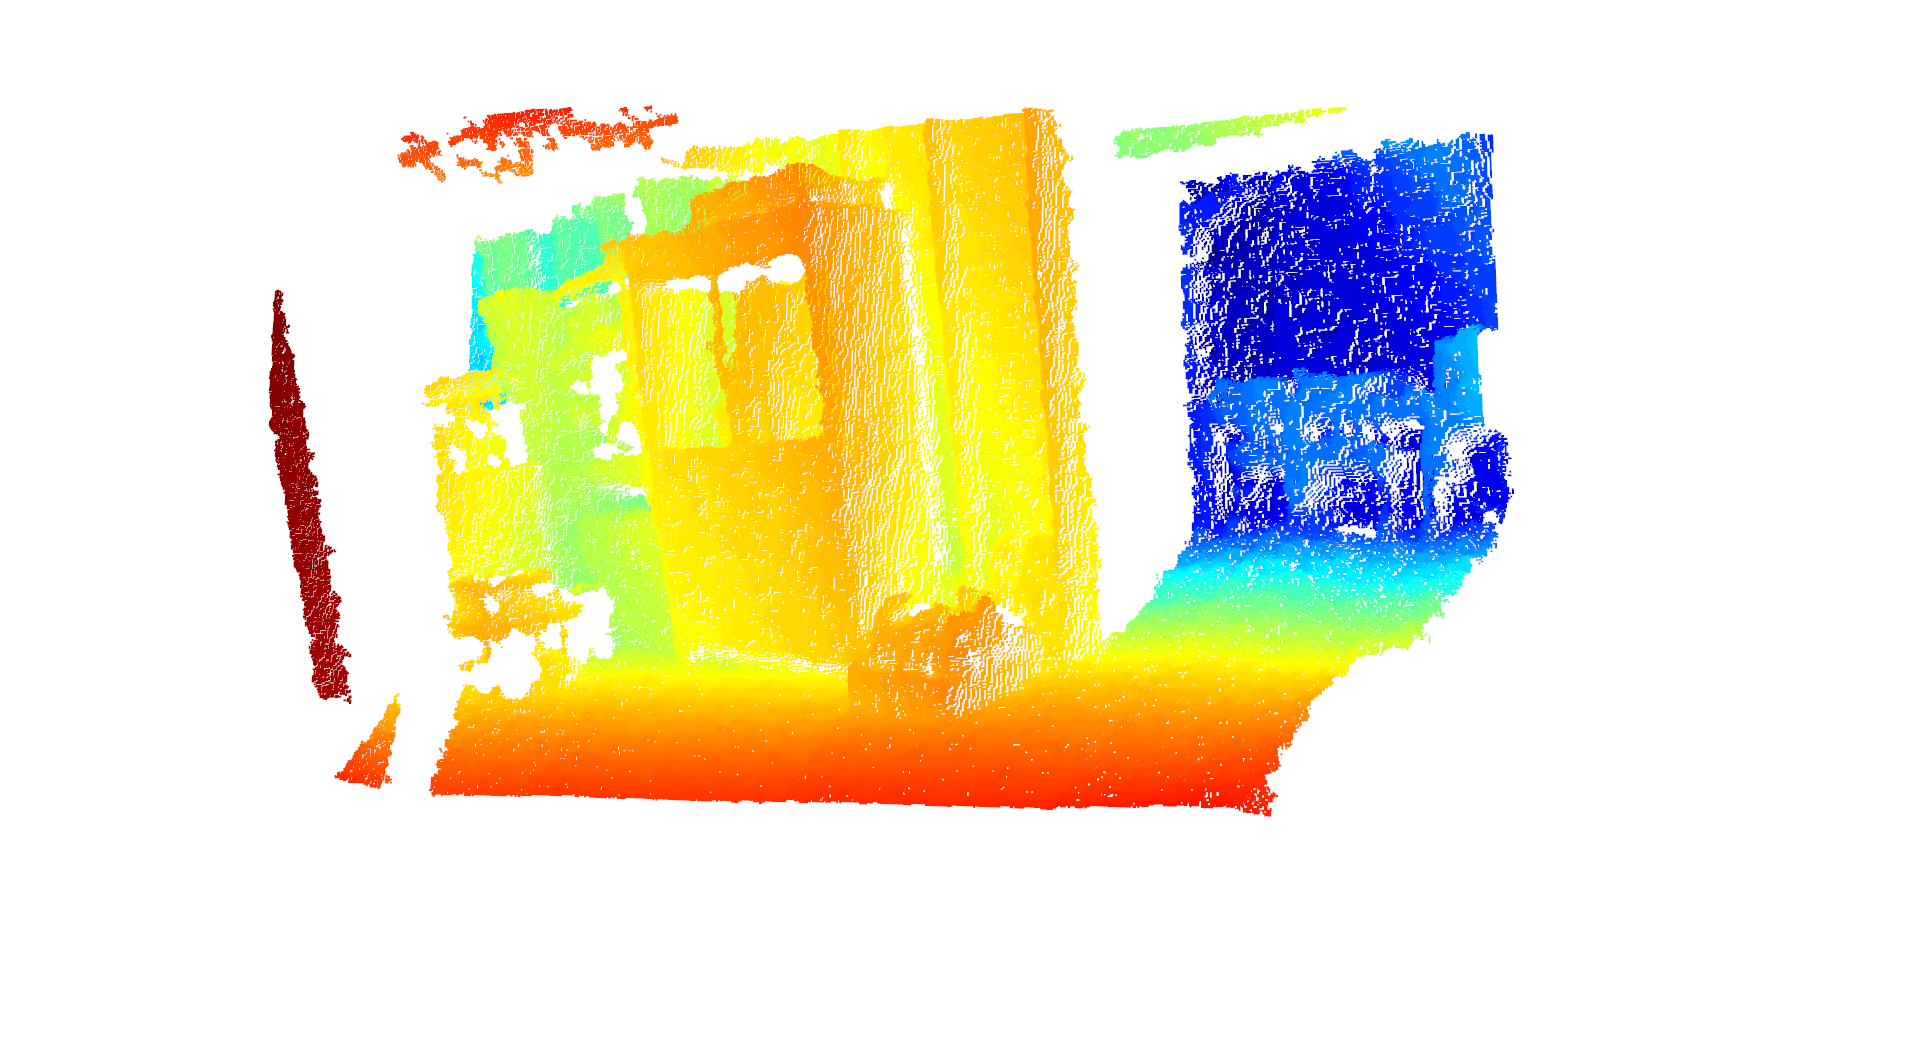

In [28]:
o3d.visualization.draw_geometries([pcd], zoom=0.5) # color with distance [4]

#### TUM dataset
This section shows how to read and visualize an RGBDImage from the [TUM dataset\[Strum2012\]](https://vision.in.tum.de/data/datasets/rgbd-dataset).

This tutorial is almost the same as Redwood dataset above. The only difference is that we use the conversion function **create_rgbd_image_from_tum_format** to parse depth images in the TUM dataset.

In [34]:
print("Read TUM dataset")
color_raw = o3d.io.read_image("Open3D/examples/test_data/RGBD/other_formats/TUM_color.png")
depth_raw = o3d.io.read_image("Open3D/examples/test_data/RGBD/other_formats/TUM_depth.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_tum_format(color_raw, depth_raw)
print(rgbd_image)
print("color_raw:\n", np.asarray(color_raw)[319:321, 235:245])
print("depth_raw:\n", np.asarray(depth_raw)[319:321, 235:245])

Read TUM dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.
color_raw:
 [[[90 86 86]
  [90 85 87]
  [90 85 87]
  [89 85 87]
  [88 85 86]
  [88 84 86]
  [89 85 87]
  [90 85 87]
  [90 86 80]
  [90 87 78]]

 [[90 87 88]
  [90 86 89]
  [91 86 88]
  [92 86 88]
  [91 85 87]
  [91 85 87]
  [90 85 90]
  [89 85 91]
  [89 85 81]
  [90 87 79]]]
depth_raw:
 [[14665 14665 14665 14665 14665 14665 14665 14665 14540 14540]
 [14540 14540 14540 14540 14540 14540 14540 14540 14540 14540]]


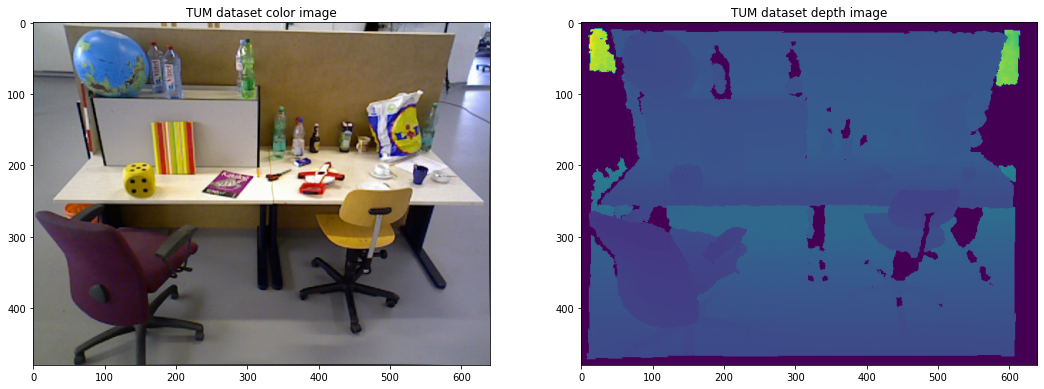

In [36]:
# Checking images
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("TUM dataset color image")
ax1.imshow(color_raw) # 
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("TUM dataset depth image")
ax2.imshow(depth_raw) # 

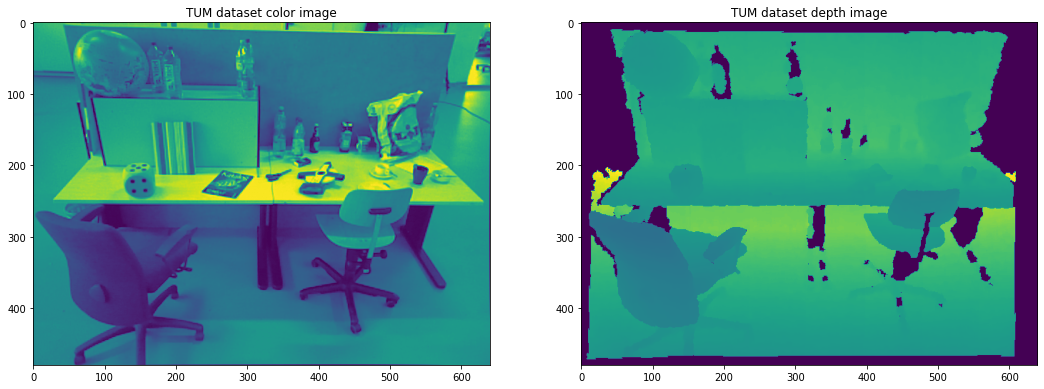

In [37]:
# Checking images
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("TUM dataset color image")
ax1.imshow(rgbd_image.color) # 
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("TUM dataset depth image")
ax2.imshow(rgbd_image.depth) # 

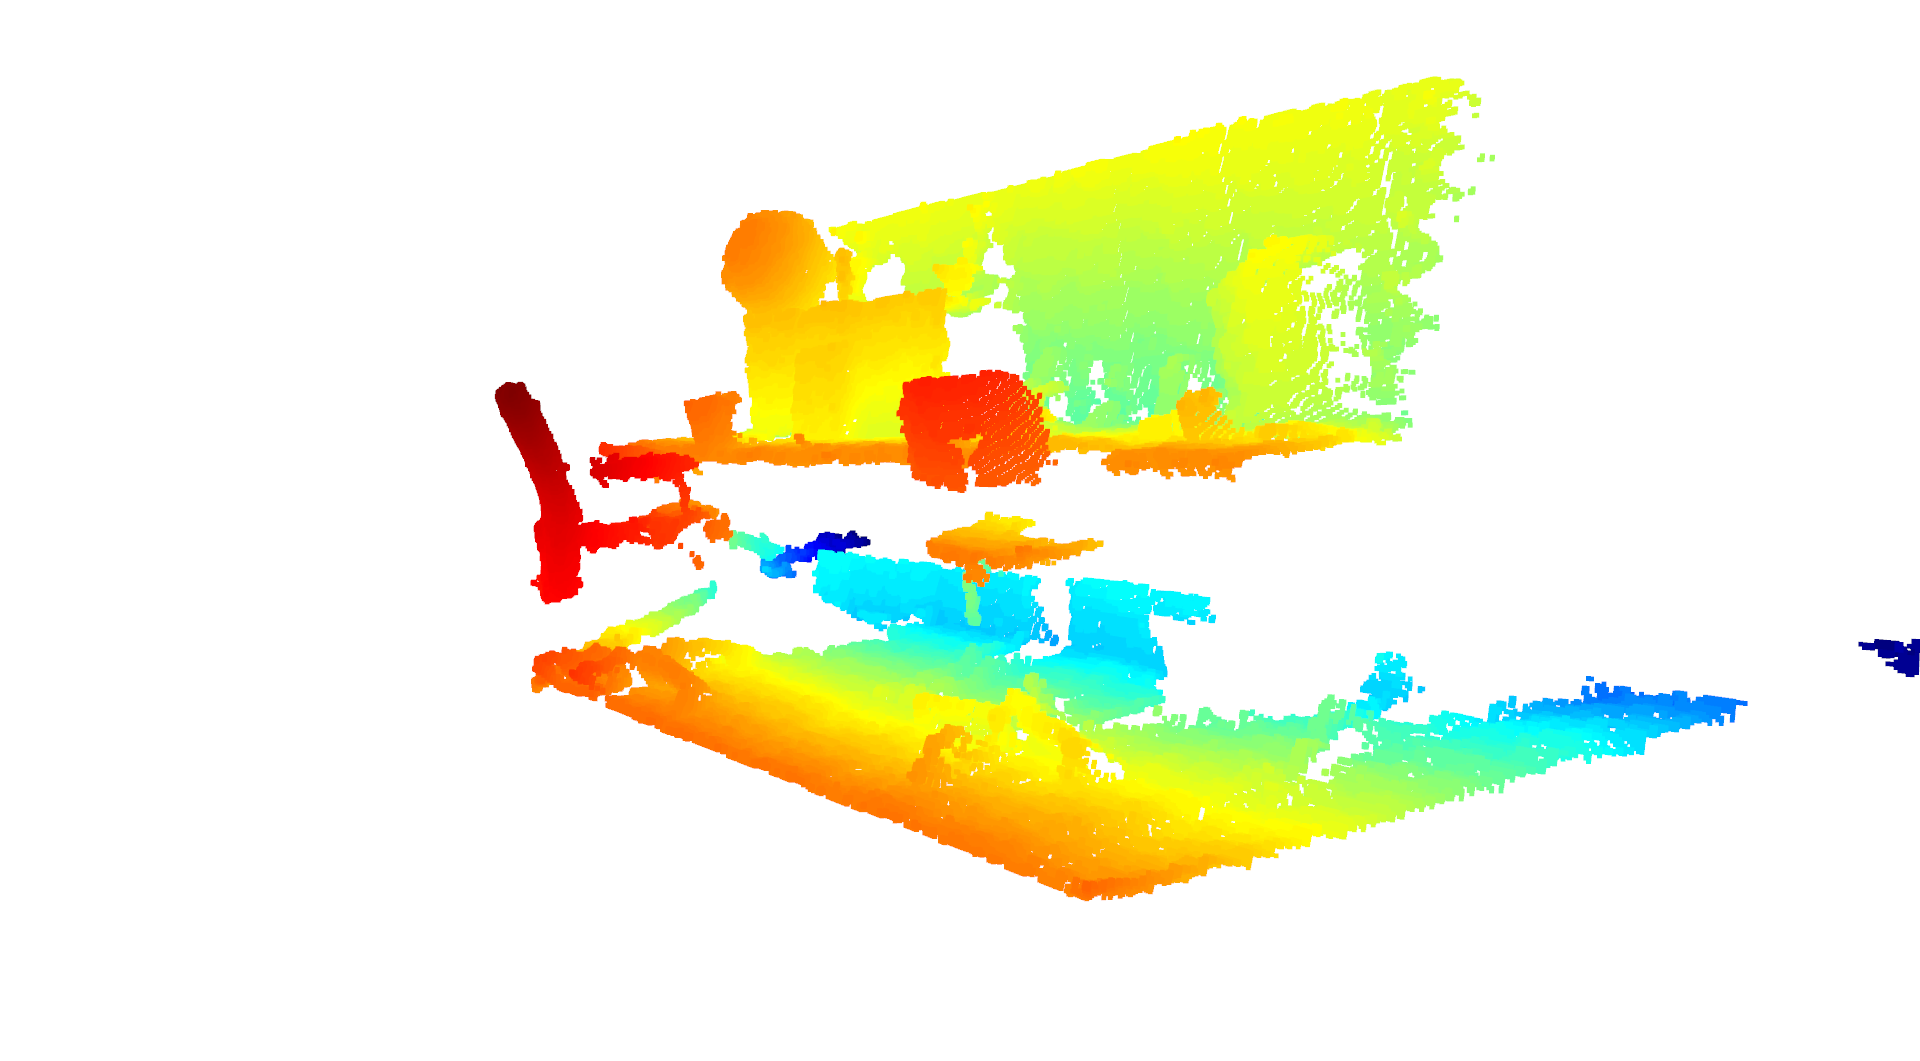

In [38]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)
)

# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1,0,0,0], [0,-1,0,0], [0,0,-1,0], [0,0,0,1]])
o3d.visualization.draw_geometries([pcd], zoom=0.35)

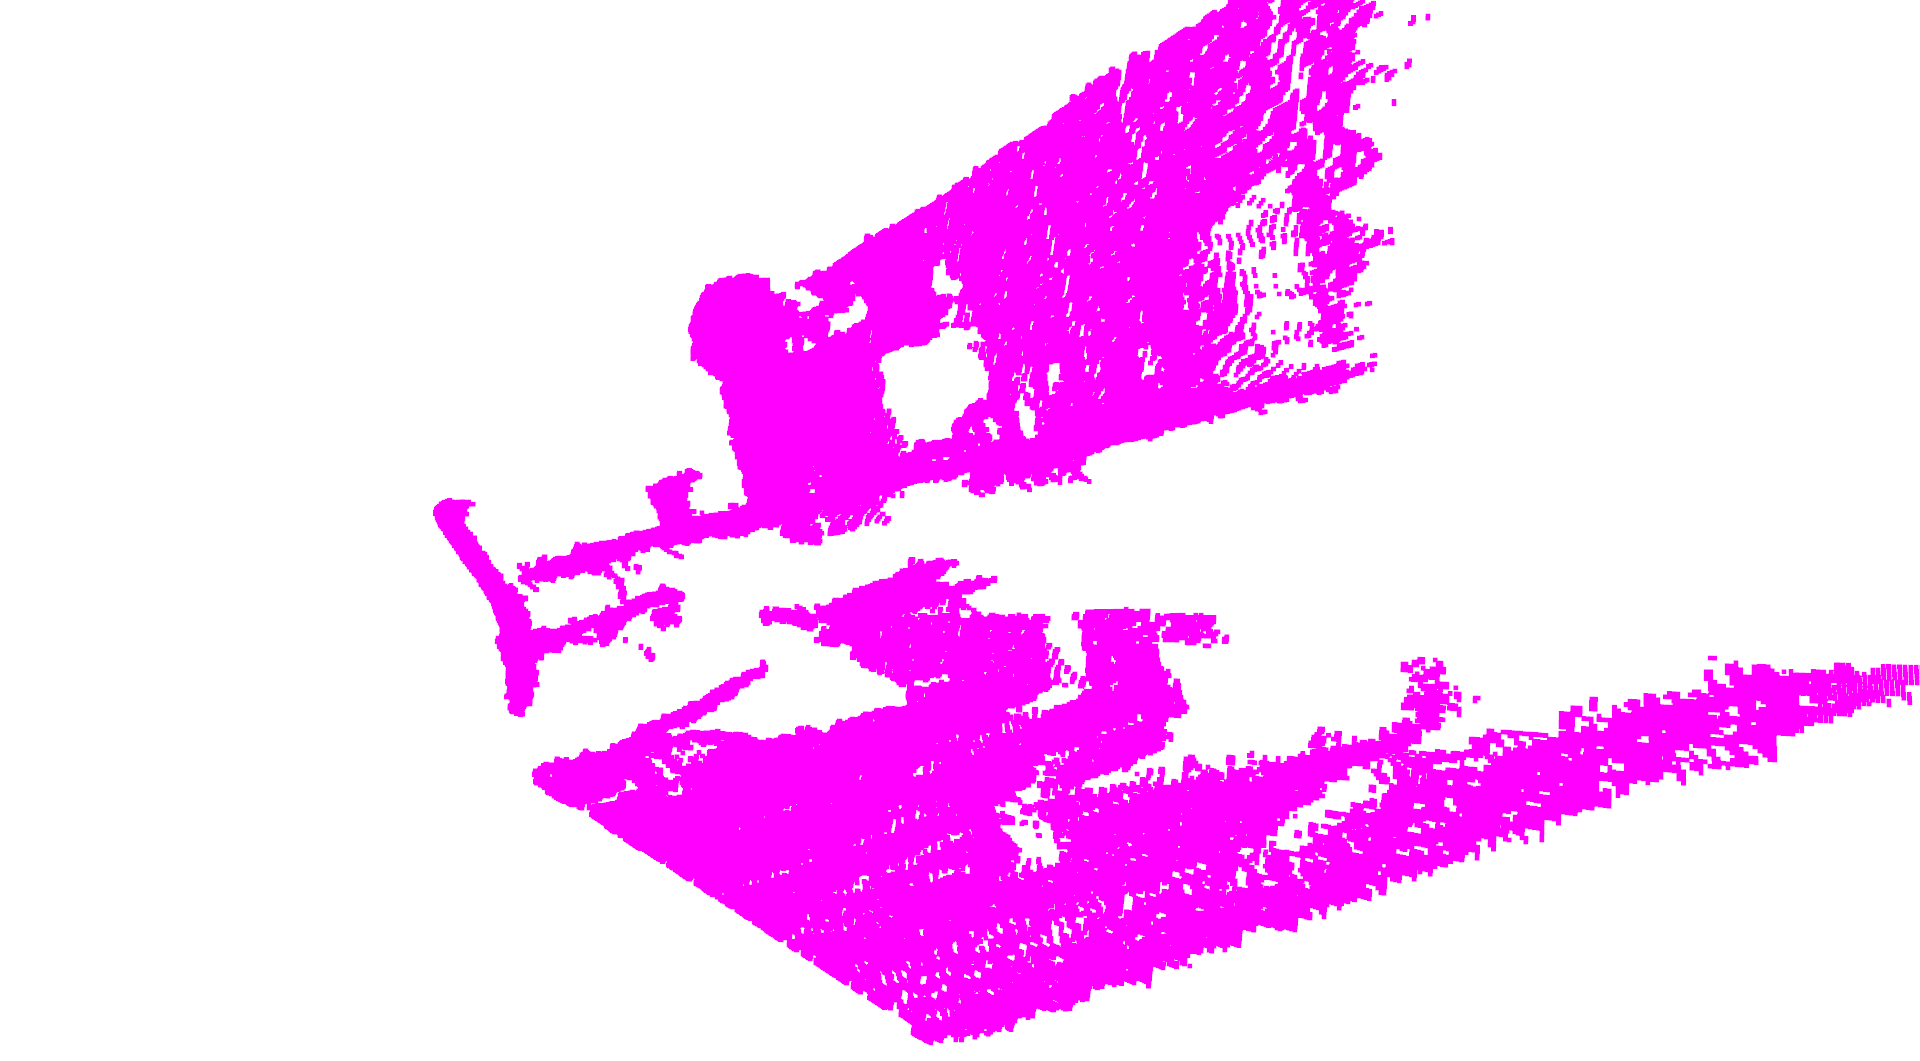

In [40]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)
)
pcd.paint_uniform_color([1., 0., 1.])
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1,0,0,0], [0,-1,0,0], [0,0,-1,0], [0,0,0,1]])
o3d.visualization.draw_geometries([pcd], zoom=0.35)